# INFERENTIAL STATISTICS HANDSON

### A large retail chain (eg reliance, walmart ) operates 10000 stores and we want to know (consultants) what is the average daily sales per store

#### Approach : lets us taka a sample of stores n = 200 , avg of sample store is 120k/day  and sample std deviation sales is 15k/day

In [3]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
## STEP 1 . Generate sample data (200 stores)
sales = np.random.normal(loc=120000,scale=15000,size=200) #loc: mean of the distribution , scale: std deviation , size : no of sample.
sales

array([110263.34212231, 105287.30485057, 114694.44948827, 101707.10902418,
        88726.45703674, 108001.94369818, 134682.43041663, 127574.65916472,
       112682.73680796, 118736.62316762,  86771.9326425 , 109201.896081  ,
        90079.88328044, 103680.19793697, 104847.64143182, 105375.83900905,
       128763.42810209, 140377.12542959, 105203.40989155, 132890.58026988,
       123340.11433997, 134905.3211717 , 121884.7802484 ,  93100.33486379,
       116739.91007927, 111911.52830612, 124955.4359164 , 123421.77930844,
       112784.38608564,  94348.28171775, 122290.14856879, 111203.27462633,
        98562.04369643, 110538.17525855, 142607.26119635,  77841.80434365,
       115140.90481446, 114173.99402736, 119111.6349631 , 112122.70850836,
        88057.94599821,  95520.44952741, 122067.59213208, 112622.42017875,
       116032.35679134, 123343.305509  , 137796.14908948, 123295.27702358,
       130910.07949154, 118349.65079217, 119445.79189076, 117612.57274971,
       124256.80956308, 1

In [6]:
print('Shape of the array :', sales.shape)
print('Mean of the sales data :', np.mean(sales))
print('Std. deviation of the sales data :', np.std(sales))

Shape of the array : (200,)
Mean of the sales data : 119213.27157419913
Std. deviation of the sales data : 14005.059370312878


## let us plot the sales distribution

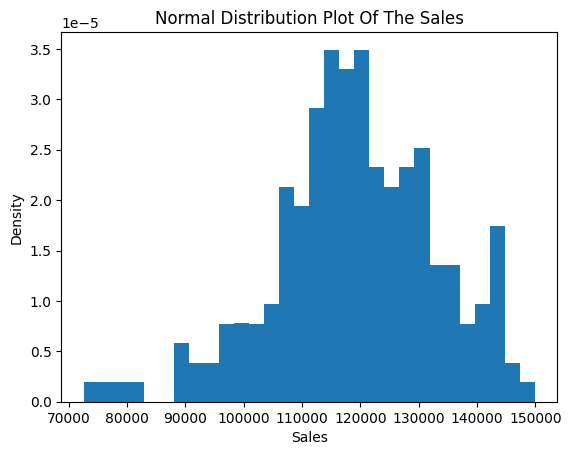

In [7]:
plt.figure()
plt.hist(sales,bins=30,density=True)
plt.title('Normal Distribution Plot Of The Sales')
plt.xlabel('Sales')
plt.ylabel('Density')
plt.show()

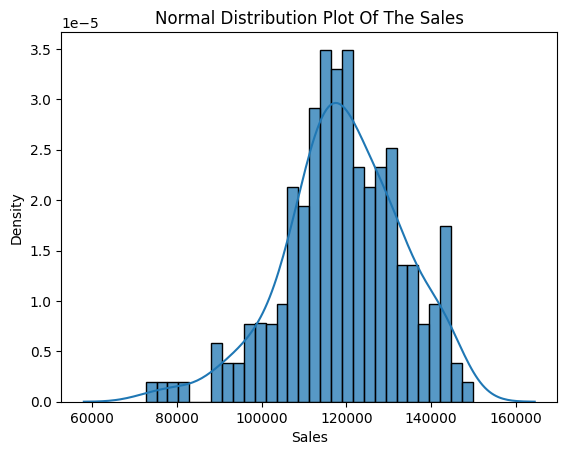

In [8]:
plt.figure()
sns.histplot(sales,bins=30,stat='density')
plt.title('Normal Distribution Plot Of The Sales')
sns.kdeplot(sales)
plt.xlabel('Sales')
plt.ylabel('Density')
plt.show()

Now we take the normal distribution curve and transform it into the standard normal distribution one using z-score technique

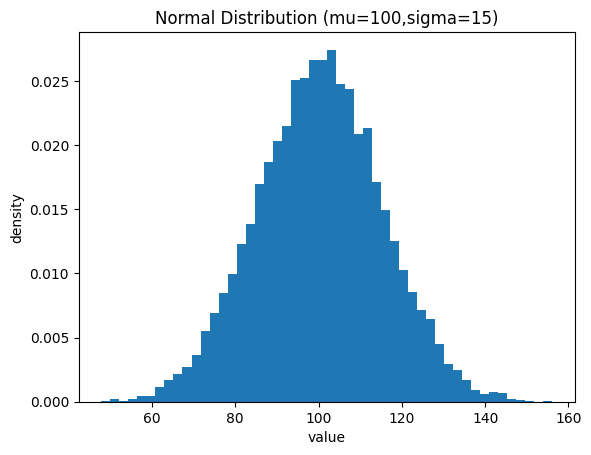

In [9]:
#generate data 
mu=100
sigma=15
data=np.random.normal(mu,sigma,10000)
# plot histogram
plt.hist(data,bins=50 , density=True)
plt.title('Normal Distribution (mu=100,sigma=15)')
plt.xlabel('value')
plt.ylabel('density')
plt.show()

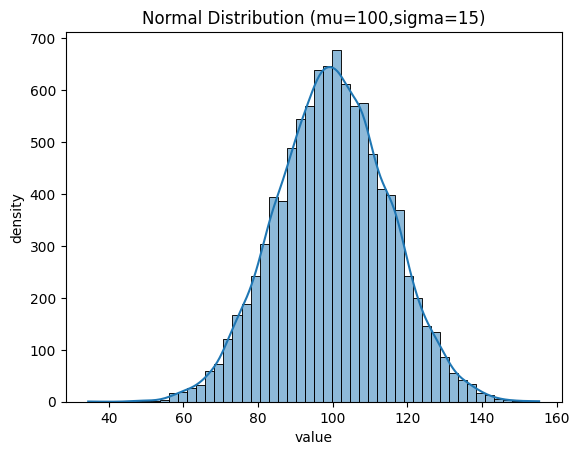

In [10]:
#generate data 
mu=100
sigma=15
data=np.random.normal(mu,sigma,10000)
# plot histogram
sns.histplot(data,bins=50 , kde=True)
plt.title('Normal Distribution (mu=100,sigma=15)')
plt.xlabel('value')
plt.ylabel('density')
plt.show()

In [11]:
mu_sigma_1=np.mean((data>=mu - sigma) & (data<=mu+sigma))
mu_sigma_2=np.mean((data>=mu - 2*sigma) & (data<=mu+2*sigma))
mu_sigma_3=np.mean((data>=mu - 3*sigma) & (data<=mu+3*sigma))
mu_sigma_1,mu_sigma_2,mu_sigma_3

(np.float64(0.6762), np.float64(0.9577), np.float64(0.998))

# CONFIDENCE INTERVAL CALCULATION

In [12]:
sales

array([120810.75371447, 120193.63482138, 129194.98636573, 115320.03868778,
       112609.89770002, 106216.48662147, 149901.73249388, 117342.05416162,
       119616.52742995, 135180.27402154,  89491.20976675, 121112.93439233,
       109221.05224247, 125245.19749326, 112874.40203032, 120680.64572355,
       131374.59499647, 110715.56860036, 110190.81568561, 126674.66863323,
       115129.1778622 , 116252.47493603, 116600.5176161 , 121128.12186285,
       127643.97032485, 143488.25773764, 135772.80538996, 113377.95666955,
       130662.09587614, 143147.41719859, 101176.37390685,  97831.42806712,
       140265.29951272, 121903.65436257, 125293.47902988,  98869.8025902 ,
       123857.86542965,  91165.84698978,  88760.14375911, 113046.5685026 ,
       122746.36407142, 123415.6171857 , 121188.29154844, 135114.23056992,
       127536.66033698, 121439.71170132, 127614.00297462, 128479.04910886,
       111438.77316333, 138637.80611363,  77500.2269563 ,  93506.31882283,
       114359.59022982, 1

In [13]:
sales.shape

(200,)

In [20]:
# compute sample statistics
sample_mean=np.mean(sales)
sample_std=np.std(sales,ddof=1) # degree of freedom
sample_size=len(sales)
sample_mean
sample_std
sample_size

200

In [21]:
## STEP-3. Choose the significance level (alpha)
alpha=0.05 #95% confidence level

In [22]:
z=stats.norm.ppf(1-alpha/2)
z

np.float64(1.959963984540054)

In [23]:
## Calculate margin of errors
margin_error= z * (sample_std/np.sqrt(sample_size))
margin_error

np.float64(1945.8372232049514)

In [25]:
## confidence level
lt=sample_mean - margin_error
ut=sample_mean + margin_error
print("confidence interval",lt,"-",ut)

confidence interval 117267.43435099418 - 121159.10879740407


## STATISTICAL TESTS

### Z-TEST

#### 1. ONE SAMPLE Z-TEST
PURPOSE :  To check the sample mean is significantly different from the population mean

##### A factory produces a ball of 5cm in diameter
##### but due to manufacturing condition every ball may not have exactly the same diameter , the std of the diameter is 0.4
##### now the quality officer would like to test whether the diameter is significantly different from 5 cm in  the sample of 50 balls randomly taken from manufacturing line.

In [29]:
pip install bioinfokit

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for bioinfokit: filename=bioinfokit-2.1.4-py3-none-any.whl size=59336 sha256=bf713f6cc44e0b6d8c338d4f2eb87f89e92710e6f72e4faa6ba919d3035e1b91
  Stored in directory: c:\users\aryan sharma\appdata\local\pip\cache\wheels\fc\51\ce\c3421fa3b4a59ff5310d04e082636ffde48c5575dba558cd49
  Created wheel for matplotlib-venn: filename=matplotlib_venn-1.1.2-py3-none-any.whl size=45437 sha256=4cbf7df8d1ee19d1ec48db611148d842efe1efb2934b808a9ff2451b0d13ff99
  Stored in directory: c:\users\aryan sharma\appdata\local\pip\cache\wheels\d1\5f\e6\771479559f992b8398265

  DEPRECATION: Building 'bioinfokit' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'bioinfokit'. Discussion can be found at https://github.com/pypa/pip/issues/6334
